In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("clean_playstore_data")

In [3]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


In [5]:
# take sample
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
695,"iPair-Meet, Chat, Dating",DATING,4.5,182986,77000.0,5000000,Free,0.0,Mature 17+,Dating,2018-08-02,5.0.8,4.1
9192,Mental Hospital:EB 2 Lite,GAME,4.1,5341,8800.0,100000,Free,0.0,Teen,Action,2014-04-30,1.0,4.0
4947,AdClear Ad blocker for Samsung,TOOLS,4.2,1586,1500.0,500000,Free,0.0,Everyone,Tools,2017-09-07,1.0.5,5.0
8300,Offroad Police Car DE,FAMILY,4.3,9149,80000.0,1000000,Free,0.0,Everyone,Simulation,2017-03-15,1.3,2.3.3
9558,El Dorado App,TRAVEL_AND_LOCAL,4.4,221,33000.0,10000,Free,0.0,Everyone,Travel & Local,2018-04-06,2.4,4.1


In [6]:
data.shape

(10840, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     9476 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [8]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,21506.534062,1.546434e+07,1.027368
std,0.515219,2.927761e+06,22596.020795,8.502936e+07,15.949703
min,1.000000,0.000000e+00,10.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4900.000000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [9]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
# univarite/bivariente and multivariante

In [11]:
data[data.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,NaN
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,NaN
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,NaN
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,NaN
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86000.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0


In [12]:
data[data.duplicated("App")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,NaN
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10714,FarmersOnly Dating,DATING,3.0,1145,1400.0,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0
10719,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4000.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0
10729,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4
10752,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4


In [13]:
data = data.drop_duplicates(subset="App",keep="first")

In [14]:
data.shape

(9659, 13)

In [15]:
# fatch catigerocal/and numerical collemens
catigerocal_features = data[data.dtypes[data.dtypes == "object"].index]

In [16]:
catigerocal_features.head(3)

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3


In [17]:
# fatch catigerocal/and numerical collemens
numerical_features = data[data.dtypes[data.dtypes != "object"].index]

In [18]:
numerical_features.head(3)

,Rating,Reviews,Size,Installs,Price
0,4.1,159,19000.0,10000,0.0
1,3.9,967,14000.0,500000,0.0
2,4.7,87510,8700.0,5000000,0.0


In [19]:
# value count
data["Type"].value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

In [20]:
# get percentages
data["Type"].value_counts(normalize=True)*100

Free    92.172292
Paid     7.827708
Name: Type, dtype: float64

In [21]:
# get all colums percentage
for i in catigerocal_features:
    print(i,data[i].value_counts(normalize=True)*100)

App Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: App, Length: 9659, dtype: float64
Category FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE                 3.571798
S

<AxesSubplot:xlabel='Type', ylabel='count'>

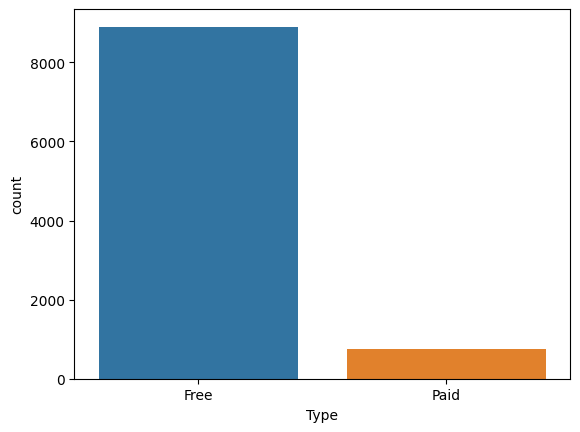

In [22]:
# plot the count plot to seet the count of data in catogeries
#  univarite
sns.countplot(x=data["Type"])

<AxesSubplot:xlabel='Content Rating', ylabel='count'>

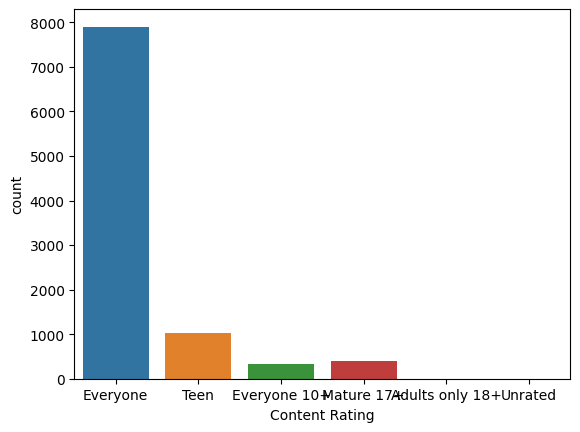

In [23]:
sns.countplot(x=data["Content Rating"],)

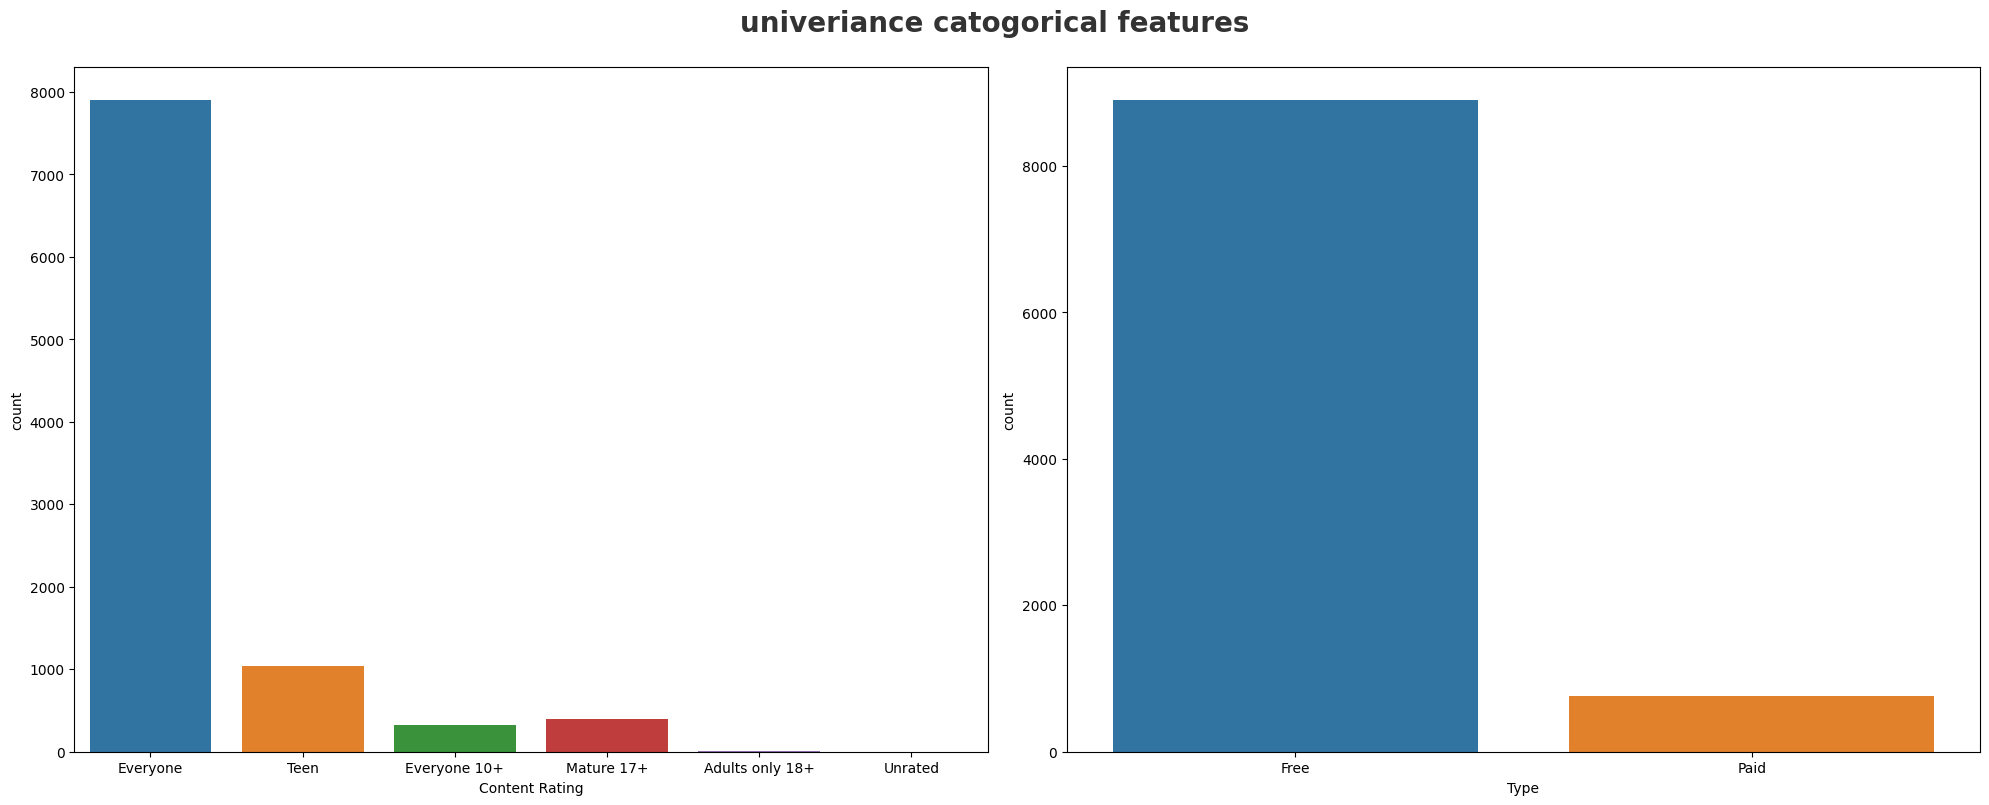

In [24]:
plt.figure(figsize=(20,15))
plt.suptitle("univeriance catogorical features",fontsize=20,fontweight="bold",alpha=0.8,y=1)
catogrical =["Content Rating","Type"]
for i in range(0,len(catogrical)):
    plt.subplot(2,2,i+1)
    sns.countplot(x = data[catogrical[i]])
    plt.tight_layout()

In [25]:
numerical_features.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price'], dtype='object')

<AxesSubplot:xlabel='Price', ylabel='Density'>

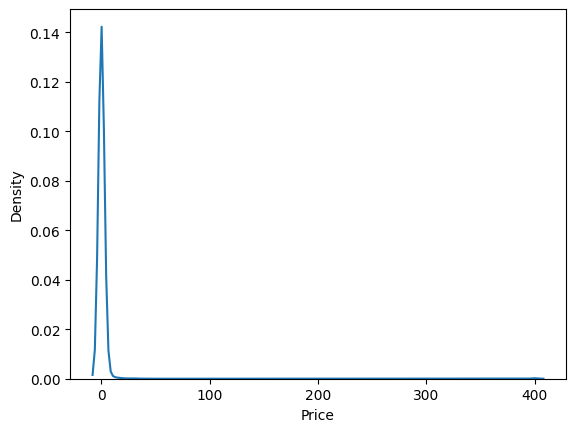

In [26]:
sns.kdeplot(data["Price"])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

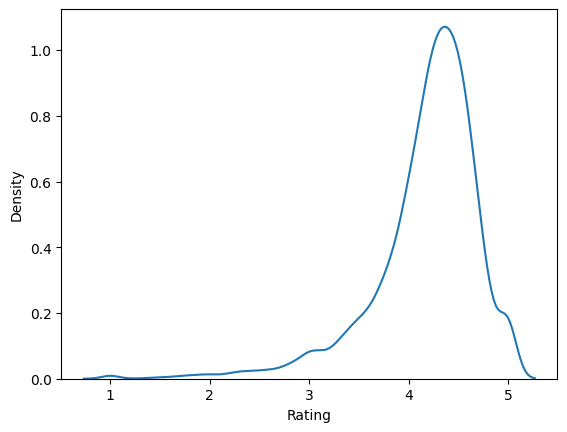

In [27]:
sns.kdeplot(data['Rating'])

In [28]:
# plt.figure(figsize=(15,15))
# plt.suptitle("univeriance numeric features",fontsize=20,fontweight="bold",alpha=0.8,y=1.)
# for i in range(0,len(numerical_features)):
#     plt.subplot(5,3,i+1)
#     sns.kdeplot(x = data[numerical_features[i]],shade=True,color="r")
#     plt.xlabel(numerical_features[i])
#     plt.tight_layout()

<AxesSubplot:ylabel='Category'>

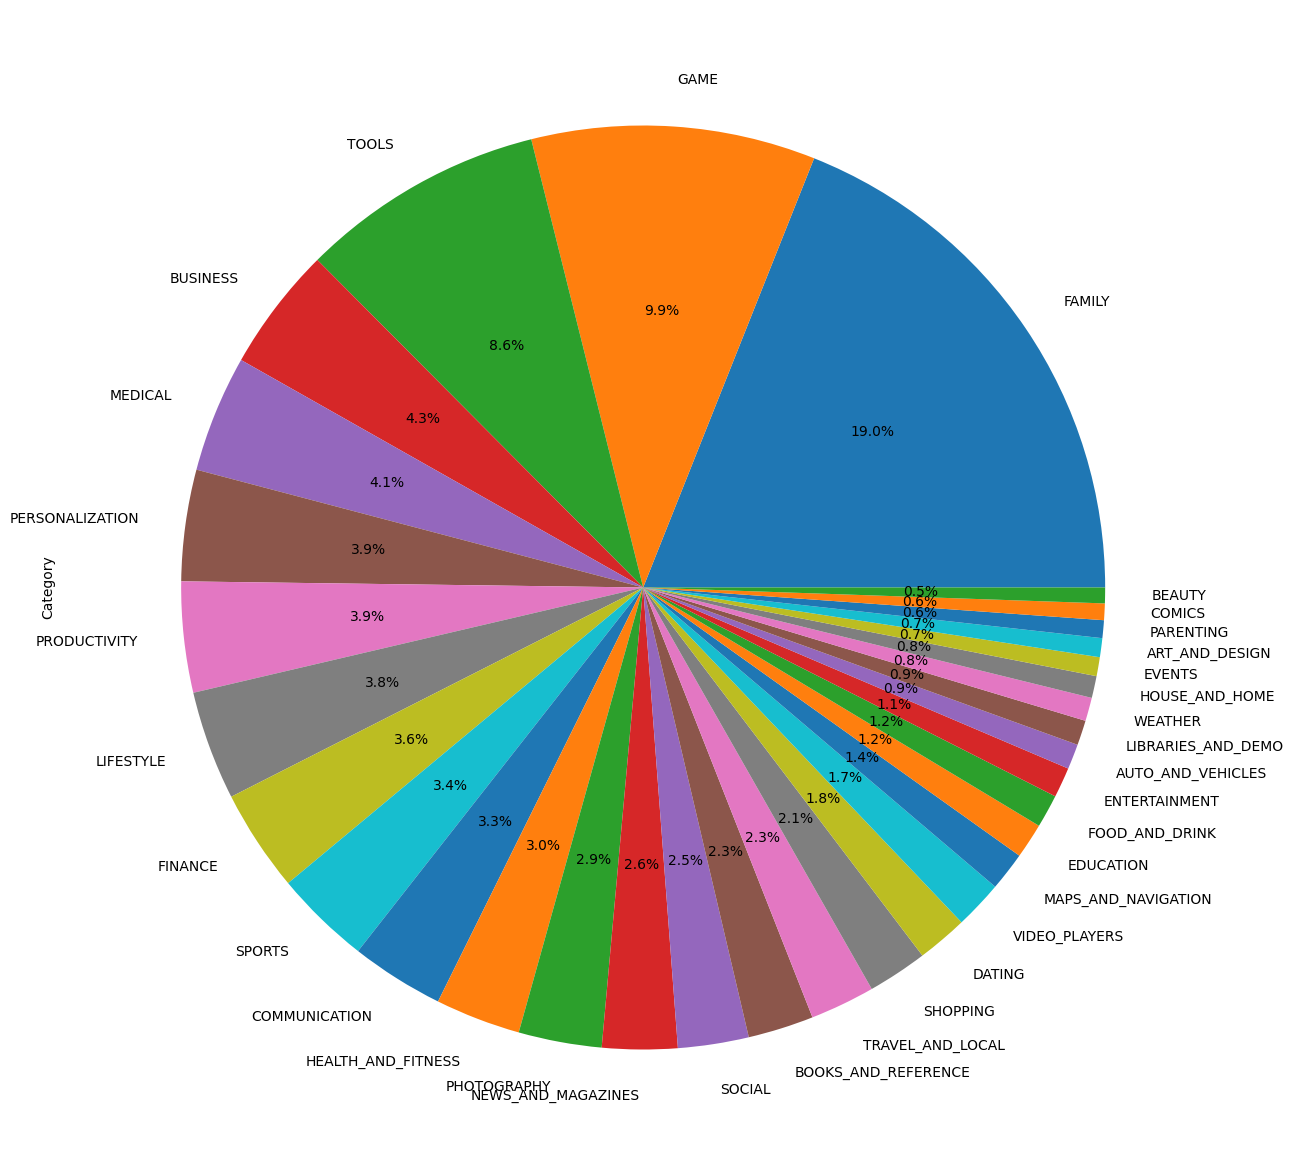

In [29]:
# most populler ctogary in app
data["Category"].value_counts().plot.pie(figsize=(20,15),autopct="%1.1f%%")

Text(0, 0.5, 'Count')

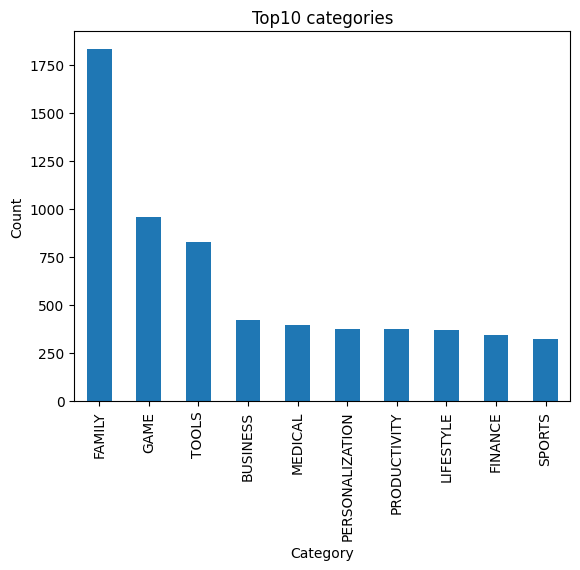

In [30]:
# top10 catoueries
data["Category"].value_counts().head(10).plot.bar()
plt.title("Top10 categories")
plt.xlabel("Category")
plt.ylabel("Count")

In [31]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3


In [32]:
# which catogery largest no fo instllation
# bivariente analysis
install = data.groupby("Category")["Installs"].sum().sort_values(ascending=False).head(10)

Text(0.5, 1.0, ' largest number fo instllation')

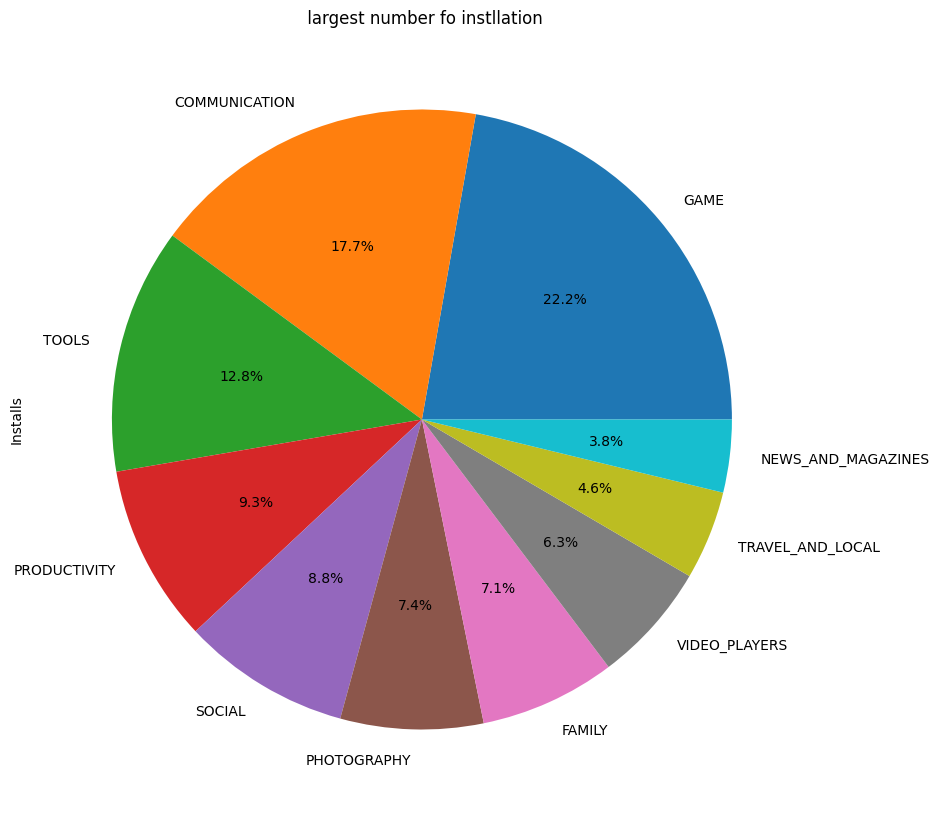

In [33]:
install.plot.pie(autopct="%1.1f%%",figsize=(10,20))
plt.title(" largest number fo instllation")

In [34]:
cat =data.groupby(["Category","App"])["Installs"].sum().sort_values(ascending=False).reset_index().head(5)

In [35]:
cat[cat.Category == "COMMUNICATION"]

,Category,App,Installs
2,COMMUNICATION,Skype - free IM & video calls,1000000000
4,COMMUNICATION,WhatsApp Messenger,1000000000


Text(0.5, 1.0, 'app install most')

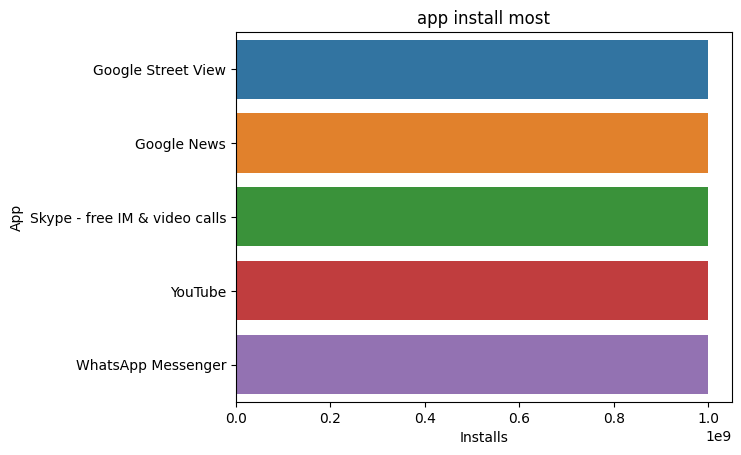

In [36]:
sns.barplot(x="Installs",y="App",data=cat)
plt.title("app install most")

In [37]:
# how many app are there are have 5 reating
rating = data.groupby("App")["Rating"].sum().sort_values(ascending=False).reset_index().head(5)

In [38]:
rating

,App,Rating
0,Comunidad De Fe Minitries,5.0
1,Tablet Reminder,5.0
2,Noticias FC Barcelona,5.0
3,"Superheroes, Marvel, DC, Comics, TV, Movies News",5.0
4,DC N COMPANY ENTERTAINMENT RADIO!,5.0


<AxesSubplot:xlabel='Price', ylabel='Category'>

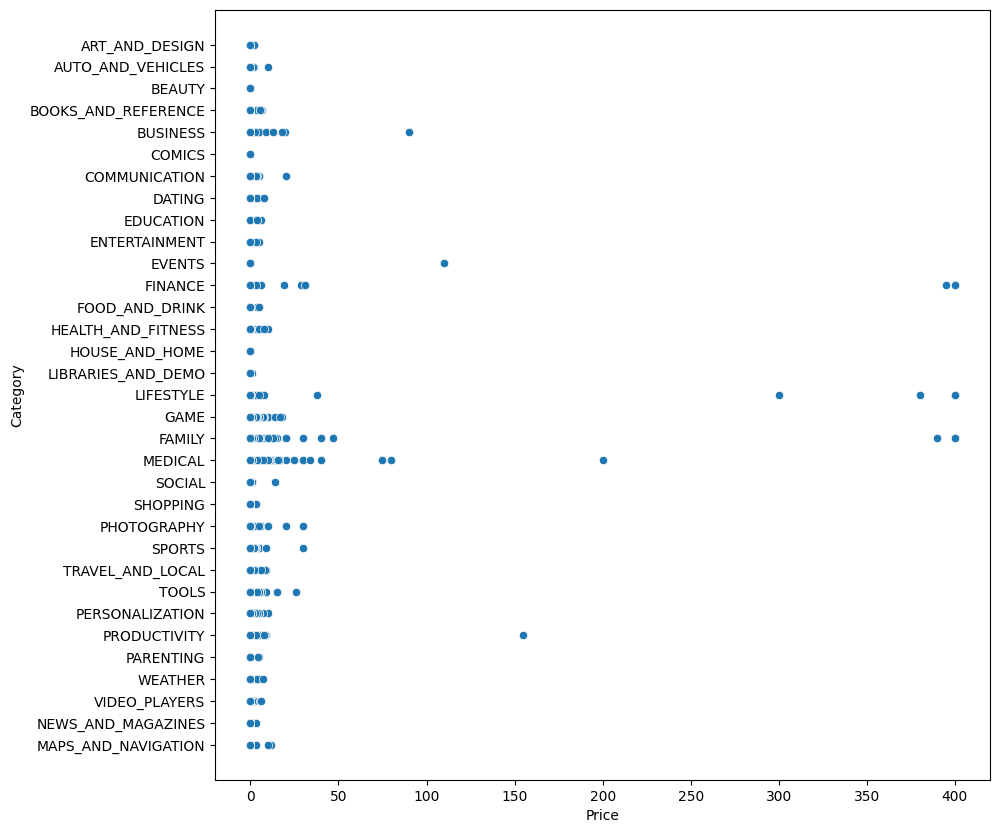

In [39]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data , y="Category",x="Price")

In [40]:
# ehich catogery app users are reviwing the most
ca=data.groupby(["App","Category"])["Reviews"].sum().sort_values(ascending=False).reset_index().head(5)

In [41]:
ca

,App,Category,Reviews
0,Facebook,SOCIAL,78158306
1,WhatsApp Messenger,COMMUNICATION,69119316
2,Instagram,SOCIAL,66577313
3,Messenger – Text and Video Chat for Free,COMMUNICATION,56642847
4,Clash of Clans,GAME,44891723


<AxesSubplot:title={'center':'App VS Reviews'}, xlabel='Reviews', ylabel='App'>

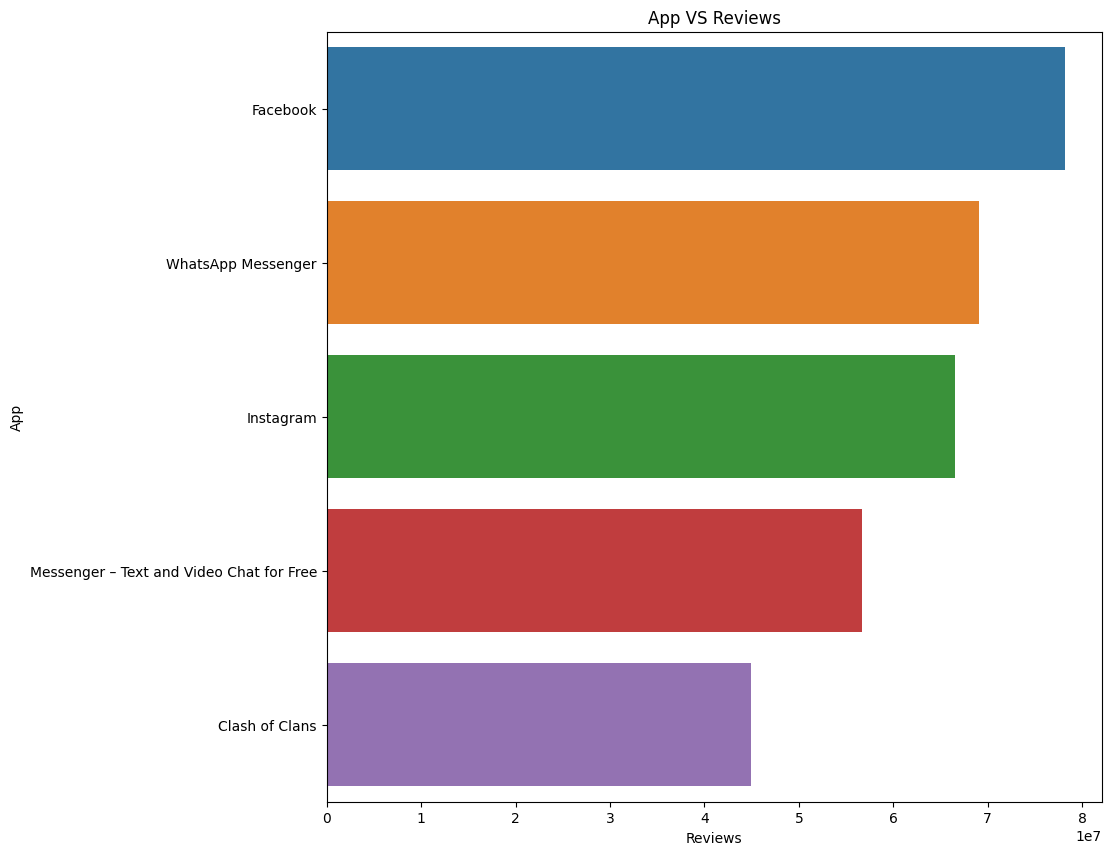

In [42]:
plt.figure(figsize=(10,10))
plt.title("App VS Reviews")
sns.barplot(x="Reviews",y = "App",data=ca)

<AxesSubplot:ylabel='Installs'>

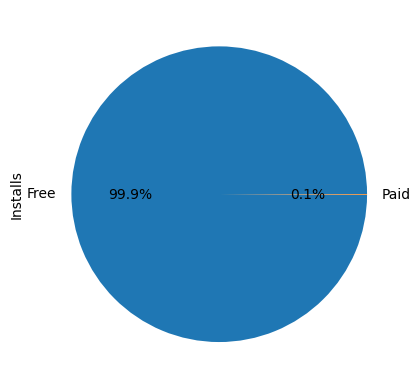

In [46]:

data.groupby("Type")["Installs"].sum().plot.pie(autopct="%1.1f%%")

<AxesSubplot:ylabel='Type'>

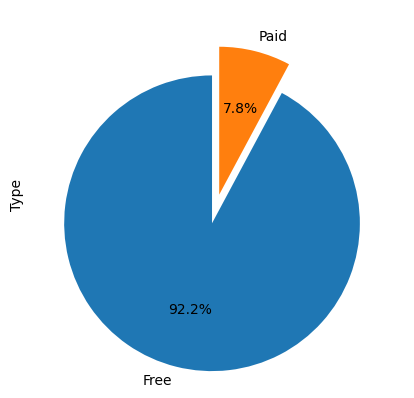

In [48]:
data["Type"].value_counts().plot.pie(startangle=90,explode=(0.2,0),autopct="%1.1f%%")

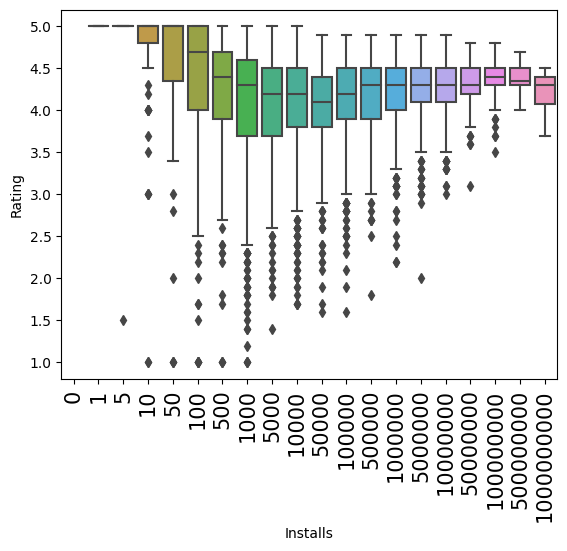

In [68]:
# boxplot
sns.boxplot(x="Installs",y="Rating",data=data)
plt.xticks(size=15,rotation=90)
plt.show()

Text(0.5, 1.0, 'higher size in data')

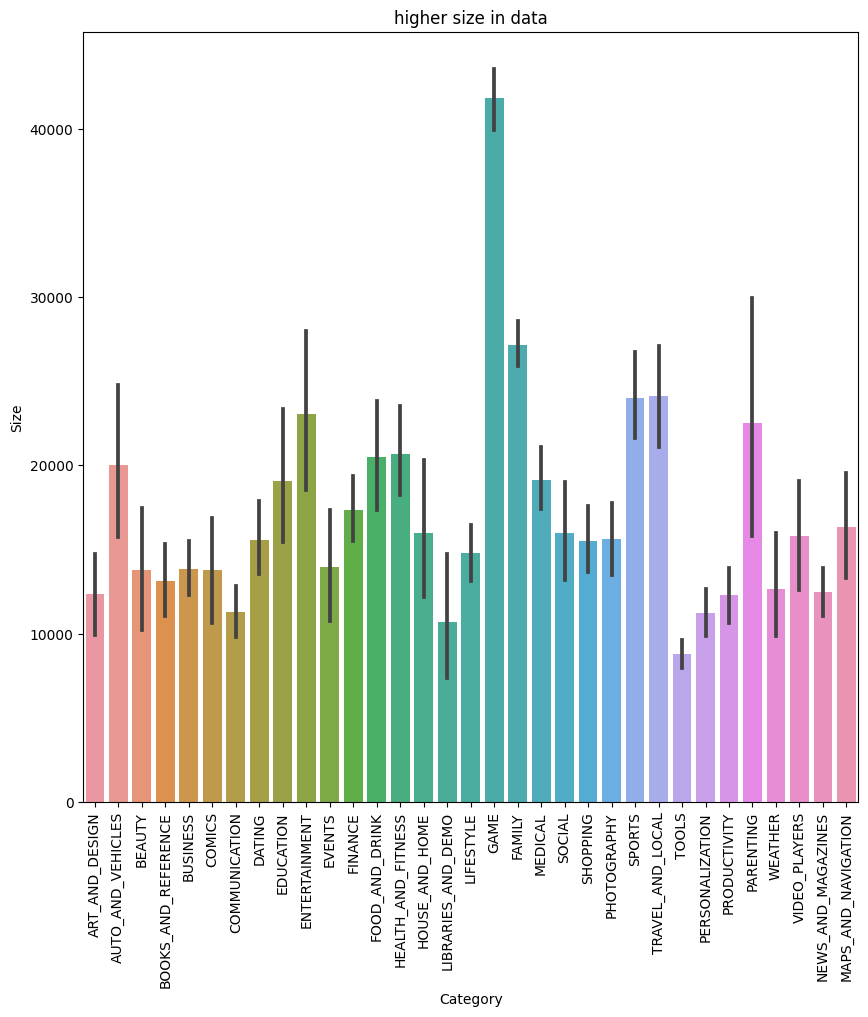

In [88]:
plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sns.barplot(x = "Category",y = "Size",data=data)
plt.title("higher size in data")

Text(0.5, 1.0, 'count plot of ratings')

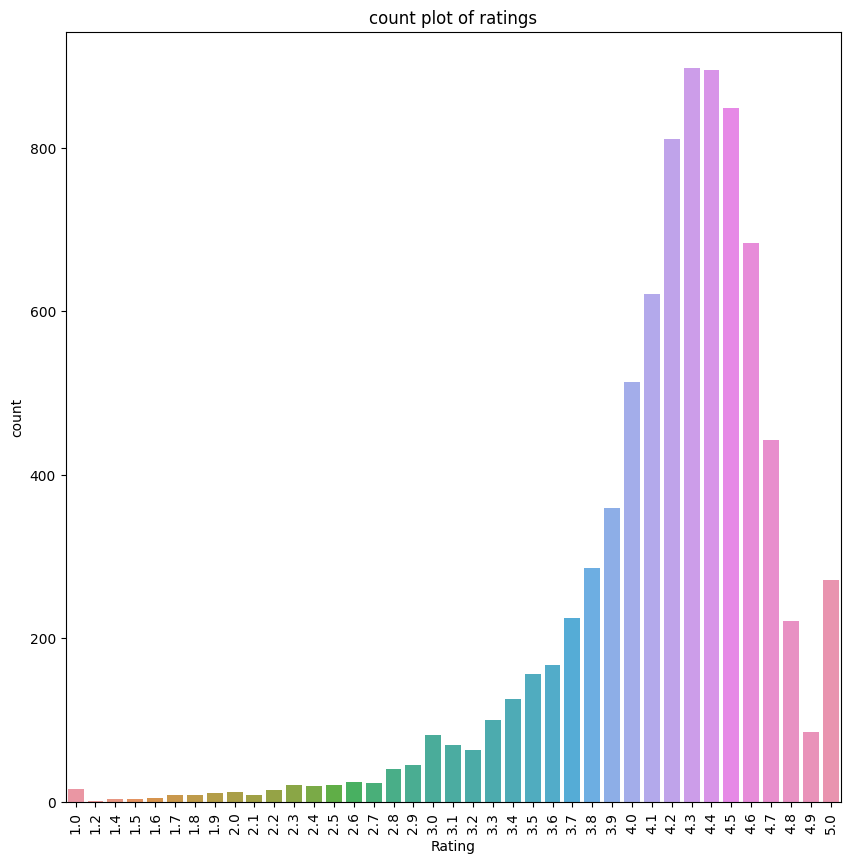

In [95]:
plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sns.countplot(x="Rating",data=data)
plt.title("count plot of ratings")

<AxesSubplot:>

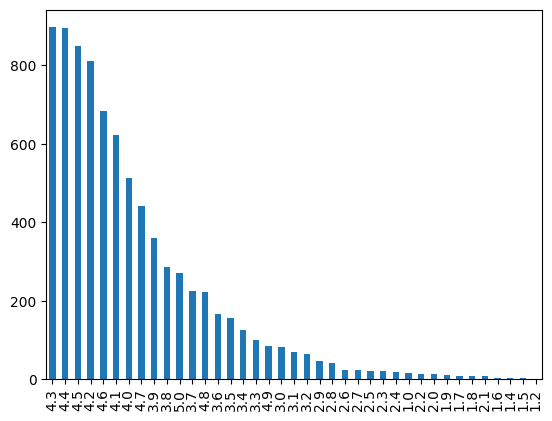

In [100]:
data["Rating"].value_counts().plot.bar()

In [ ]:
# # uci repo
# 1.census income
# 2.energy effency
# 3.phissing website
# 4.Energi